# Kaggle NLP Tutorial Using Python
https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

In [24]:
# Import Statements
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
# Import data into dataframe
path = '/Users/andreakeane/Documents/DataScience/spooky-author-identification/'
data = pd.read_csv(path + "train.csv")
data.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


## Data Exploration

In [5]:
# Investigate df contents
print(data.shape)
print(data.author.unique())

(19579, 3)
['EAP' 'HPL' 'MWS']


In [6]:
# Determine number of examples per author
authors = {}
for author in data.author.unique():
    count = data[data['author'] == author].shape[0]
    authors[author] = count
print authors

{'MWS': 6044, 'EAP': 7900, 'HPL': 5635}


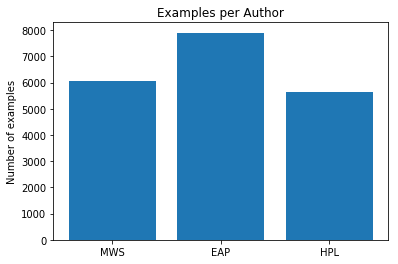

In [7]:
# Plot the number of examples per author
names = list(authors.keys())
values = list(authors.values())

plt.bar(range(len(authors)),values,tick_label=names)
plt.ylabel('Number of examples')
plt.title('Examples per Author')
plt.show()

## Text Cleaning
Clean the text samples by removing punctuation, stopwords and non-ASCII characters. 

In [77]:
def remove_punctuation(text):
    '''Removes punctuation from the text. Punctuation is !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
    return text.translate(None, punctuation)

In [78]:
def remove_stopwords(text):
    '''Removes stopwords from the text.'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
    

In [79]:
def remove_nonascii(text):
    '''Removes non-ASCII characters.'''
    text = [word.decode('ascii',errors='ignore') for word in text.split()]
    # joining the list of words with space separator
    return " ".join(text)

In [80]:
data['text'] = data['text'].apply(remove_punctuation)
data.head(10)

TypeError: translate() takes exactly one argument (2 given)

In [81]:
sw = stopwords.words('english')
data['text'] = data['text'].apply(remove_nonascii)
data['text'] = data['text'].apply(remove_stopwords)
data.head(10)

,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth els even gold superintend abandon at...,HPL,102
5,id22965,youth pass solitud best year spent gentl femin...,MWS,265
6,id09674,astronom perhap point took refug suggest non l...,EAP,75
7,id13515,surcingl hung riband bodi,EAP,25
8,id19322,knew could say stereotomi without brought thin...,EAP,267
9,id00912,confess neither structur languag code govern p...,MWS,80


In [82]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()  

In [83]:
def plot_top(vocab_dict, limit=20):
    # lists to store the vocab and counts
    vocab = []
    count = []
    # iterate through each vocab and count append the value to designated lists
    for key, value in dictionary:
        vocab.append(key)
        count.append(value)
    # store the count in pandas dataframe with vocab as index
    vocab = pd.Series(count, index=vocab)
    # sort the dataframe
    vocab = vocab.sort_values(ascending=False)
    top_vocab = vocab.head(limit)
    top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (top_vocab.min()-10, top_vocab.max()+10))
    plt.show()

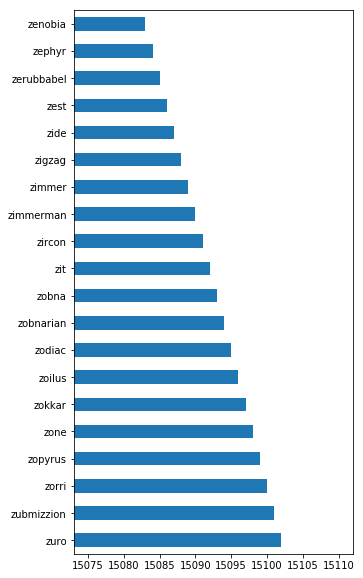

In [84]:
# Visualize the top 20 most frequent words
plot_top(dictionary)

In [85]:
stemmer = SnowballStemmer('english')

def stemming(text):    
    '''Stems each word, returns the string'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [86]:
# Exploration of the stemmer
words = [
    "running",
    "helped",
    "has",
    "necessary",
    "mispellled",
    "double trick"
]

for word in words:
    print(word + " --> " + stemmer.stem(word))

running --> run
helped --> help
has --> has
necessary --> necessari
mispellled --> mispell
double trick --> double trick


In [87]:
# Stem the text
try: 
    data['text'] = data['text'].apply(stemming)
except UnicodeDecodeError as e:
    print(e)
    
data.head(10)

,id,text,author,length
0,id26305,process howev afford mean ascertain dimen dung...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth el even gold superintend abandon att...,HPL,102
5,id22965,youth pass solitud best year spent gentl femin...,MWS,265
6,id09674,astronom perhap point took refug suggest non l...,EAP,75
7,id13515,surcingl hung riband bodi,EAP,25
8,id19322,knew could say stereotomi without brought thin...,EAP,267
9,id00912,confess neither structur languag code govern p...,MWS,80


In [88]:
def get_length(text):
    return len(text)

In [89]:
# Separate the data by author

# for author in authors:
#     authors[author] = data[data['author'] == author]
#     count = len(authors[author])
#     print(author + " = " + str(count))

data['length'] = data['text'].apply(get_length)
MWS_data = data[data['author'] == 'MWS']
EAP_data = data[data['author'] == 'EAP']
HPL_data = data[data['author'] == 'HPL']

print(MWS_data.head())

         id                                               text author  length
3   id27763  love spring look windsor terrac sixteen fertil...    MWS     137
5   id22965  youth pass solitud best year spent gentl femin...    MWS     261
9   id00912  confess neither structur languag code govern p...    MWS      80
10  id16737  shall find feel injuri shall learn dread reven...    MWS      57
15  id12799  escap must commenc destruct almost endless jou...    MWS     157


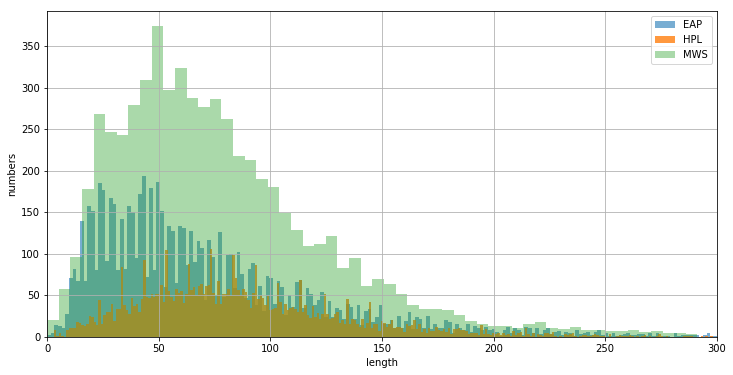

In [94]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

## Feature Extraction
Top words of each writer and their count

In [95]:
def count_vocab(data):
    '''
    Accepts dataframe for each author. Dataframe must include column "text".
    Returns dataframe of vocab and counts. 
    '''
    # create tfid vectorizer object
    tfid_vectorizer = TfidfVectorizer("english")
    # fit the vectorizer using the text data
    tfid_vectorizer.fit(data['text'])
    # collect the vocabulary items used in the vectorizer
    dictionary = tfid_vectorizer.vocabulary_.items()

    # lists to store the vocab and counts
    vocab = []
    count = []
    # iterate through each vocab and count append the value to designated lists
    for key, value in dictionary:
        vocab.append(key)
        count.append(value)
    # store the count in panadas dataframe with vocab as index
    vocab = pd.Series(count, index=vocab)
    # sort the dataframe
    vocab = vocab.sort_values(ascending=False)
    
    # return the sorted data frame
    return vocab

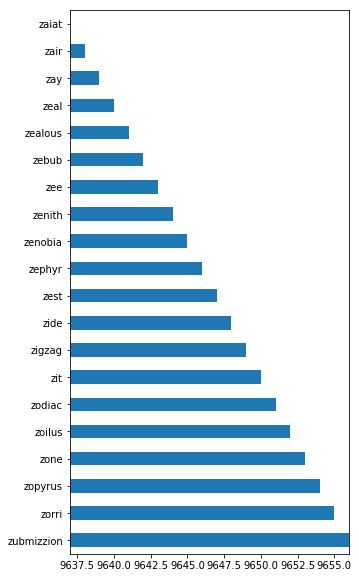

In [96]:
# Edgar Allen Poe (EAP)
EAP_vocab = count_vocab(EAP_data)
top_vocab = EAP_vocab.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (top_vocab.min(), top_vocab.max()))
plt.show()

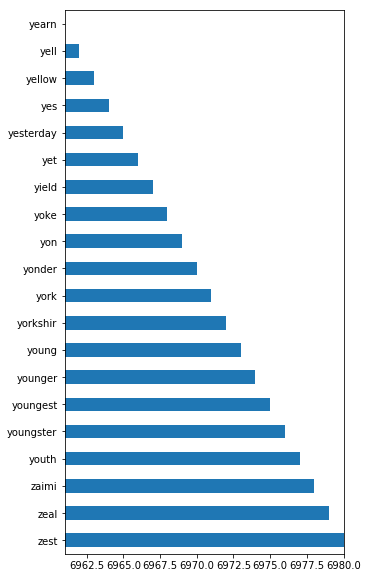

In [97]:
# Mary Shelly (MWS)
MWS_vocab = count_vocab(MWS_data)
top_vocab = MWS_vocab.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (top_vocab.min(), top_vocab.max()))
plt.show()

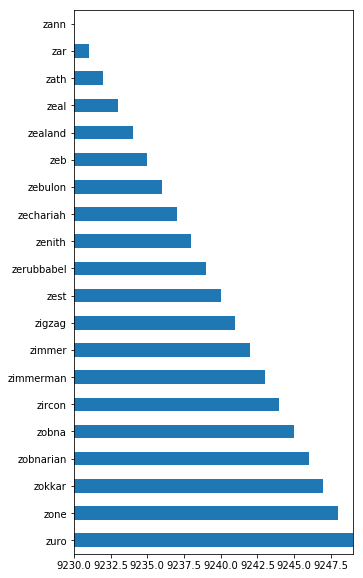

In [99]:
# HP Lovecraft (HPL)
HPL_vocab = count_vocab(HPL_data)
top_vocab = HPL_vocab.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (top_vocab.min(), top_vocab.max()))
plt.show()

TF: Frequency a feature (word) appears in the data set, scaled by the total number of features in the data set.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)



IDF:  TODO

IDF(t) = ln(Total number of documents / Number of documents with term t in it)

In [100]:
# Create a new TFID Vectorizer object
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [101]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14974,14975,14976,14977,14978,14979,14980,14981,14982,14983
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.266549,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training a Model
We are going to train Naive Bayes Classifier. Naive Bayes Classifier is a good choice given we have a medium sized dataset, NB classifier scales well and also NB classifier has been historically used in NLP tasks. We will train Multinomial and Bernoulli NB classifier, since they almost always outperfrom Gaussian NB classifier in NLP tasks.

In [102]:
# Adding the output to the dataframe
df['output'] = data['author']
df['id'] = data['id']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14976,14977,14978,14979,14980,14981,14982,14983,output,id
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id26305
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HPL,id17569
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id11008
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MWS,id27763
4,0.0,0.0,0.0,0.0,0.0,0.266549,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HPL,id12958
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MWS,id22965
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id09674
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id13515
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id19322
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MWS,id00912


In [103]:
features = df.columns.tolist()
output = 'output'
# removing the output and the id from features
features.remove(output)
features.remove('id')

In [104]:
# import modules specific to the training model
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
import numpy as np

Tuning Multinomial Naive Bayes Classifier

In [105]:
# alpha parameters to try
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([ 0.006 ,  0.0109,  0.0159,  0.0208,  0.0258,  0.0307,  0.0357,
        0.0406,  0.0456,  0.0505,  0.0555,  0.0604,  0.0654,  0.0703,
        0.0753,  0.0802,  0.0852,  0.0901,  0.0951,  0.1   ])

In [106]:
# Perform a grid search 
# GridSearchCV allows us tune parameters of a model through k-fold cross validataion using parameter grid in one go
parameter_grid = [{"alpha":alpha_list1}]

In [107]:
# classifier object
classifier1 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch1.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.006 ,  0.0109,  0.0159,  0.0208,  0.0258,  0.0307,  0.0357,
        0.0406,  0.0456,  0.0505,  0.0555,  0.0604,  0.0654,  0.0703,
        0.0753,  0.0802,  0.0852,  0.0901,  0.0951,  0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [109]:
# Collect results in pd dataframe
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

ValueError: Length of values does not match length of index

In [110]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()
plt.show()

KeyError: 'neglogloss'

In [111]:
print("Best parameter: ",gridsearch1.best_params_)
print("Best score: ",gridsearch1.best_score_) 

('Best parameter: ', {'alpha': 0.020799999999999999})
('Best score: ', -0.44300946000433011)
